# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Initialization" data-toc-modified-id="Initialization-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Initialization</a></div><div class="lev2 toc-item"><a href="#Common-parameters" data-toc-modified-id="Common-parameters-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Common parameters</a></div><div class="lev2 toc-item"><a href="#Threshold-voltage" data-toc-modified-id="Threshold-voltage-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Threshold voltage</a></div><div class="lev1 toc-item"><a href="#DC-sweep" data-toc-modified-id="DC-sweep-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>DC sweep</a></div><div class="lev3 toc-item"><a href="#Turnon" data-toc-modified-id="Turnon-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Turnon</a></div><div class="lev3 toc-item"><a href="#Pinchoff" data-toc-modified-id="Pinchoff-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Pinchoff</a></div><div class="lev3 toc-item"><a href="#1D-DC-scan" data-toc-modified-id="1D-DC-scan-2.0.3"><span class="toc-item-num">2.0.3&nbsp;&nbsp;</span>1D DC scan</a></div><div class="lev3 toc-item"><a href="#2D-DC-scans" data-toc-modified-id="2D-DC-scans-2.0.4"><span class="toc-item-num">2.0.4&nbsp;&nbsp;</span>2D DC scans</a></div><div class="lev1 toc-item"><a href="#EPR-sequence---no-steering/ESR" data-toc-modified-id="EPR-sequence---no-steering/ESR-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EPR sequence - no steering/ESR</a></div><div class="lev1 toc-item"><a href="#Adiabatic-sweep-scan---ESR,-no-steering" data-toc-modified-id="Adiabatic-sweep-scan---ESR,-no-steering-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Adiabatic sweep scan - ESR, no steering</a></div><div class="lev3 toc-item"><a href="#center-frequency-scan" data-toc-modified-id="center-frequency-scan-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>center frequency scan</a></div><div class="lev2 toc-item"><a href="#LR-calibration-scan---ESR-and-steering" data-toc-modified-id="LR-calibration-scan---ESR-and-steering-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>LR calibration scan - ESR and steering</a></div><div class="lev3 toc-item"><a href="#calibration-of-adiabatic-sweep:-frequency-span-versus-time-scan" data-toc-modified-id="calibration-of-adiabatic-sweep:-frequency-span-versus-time-scan-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>calibration of adiabatic sweep: frequency span versus time scan</a></div><div class="lev1 toc-item"><a href="#Read-level-sweep---to-be-fixed" data-toc-modified-id="Read-level-sweep---to-be-fixed-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Read level sweep - to be fixed</a></div><div class="lev1 toc-item"><a href="#T1-measurement" data-toc-modified-id="T1-measurement-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>T1 measurement</a></div><div class="lev2 toc-item"><a href="#T1-analysis" data-toc-modified-id="T1-analysis-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>T1 analysis</a></div><div class="lev1 toc-item"><a href="#Notes" data-toc-modified-id="Notes-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Notes</a></div>

# Initialization

In [1]:
USE_MP=False
import silq

silq.initialize("EWJN")

qc.show_subprocess_widget()
%matplotlib nbagg

Initializing imports


<IPython.core.display.Javascript object>

Initializing functions
Initializing instruments
Connected to: Agilent Technologies E8267D (serial:SG53400039, firmware:C.06.22) in 0.04s
Initializing layout
Initializing data
Initializing analysis
Initializing parameters
Initializing plotting
Initialization complete


## Common parameters

In [2]:
frequency_center = 25.175e9

TGAC(0.334)
DF_DS(0.483)

## Threshold voltage

In [ ]:
EPR_parameter.setup(samples=50)
EPR_parameter()
traces_read = EPR_parameter.trace_segments['output']['read']
_, _, threshold_voltage = analysis.find_high_low(traces_read)
assert threshold_voltage is not None, "Couldn't find accurate threshold"
print('Threshold voltage found at {:.2f} V'.format(threshold_voltage))

# DC sweep

### Turnon

In [403]:
for k in np.linspace(1.5,0,6):
    turnon_param(k)

In [4]:
turnon_vals = list(np.linspace(0, 1.6, 200))

In [ ]:
DC_parameter.setup()
# data = qc.Loop(turnon_param[turnon_vals]
data = qc.Loop(dummy_param[0:1000:1], delay=1
               ).each(DC_parameter
                      ).then(qc.Task(layout.stop)
                             ).run(name='turnon',
                                   progress_interval=True)
plot = qc.MatPlot(data.DC_voltage)

### Pinchoff

In [6]:
turnon_voltage = 1.9
pinchoff_vals = list(np.linspace(turnon_voltage, 0, 200))
gate = RB

turnon_param(turnon_voltage)
DC_parameter.setup()
data = qc.Loop(gate[pinchoff_vals]
               ).each(DC_parameter
                      ).then(qc.Task(layout.stop)
                             ).run(name='Pinchoff_{}'.format(gate.name),
                                   progress_interval=True)
plot = qc.MatPlot(data.DC_voltage)

DataSet:
   mode     = DataMode.PULL_FROM_SERVER
   location = '2016-10-12/#013_Pinchoff_RB_15-51-46'
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | RB_set     | RB           | (200,)
   Measured | DC_voltage | DC_voltage   | (200,)
started at 2016-10-12 15:51:47


### 1D DC scan

DataSet:
   mode     = DataMode.PULL_FROM_SERVER
   location = '2016-11-03/#003_DC_TGAC_scan_11-50-05'
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | TGAC_set   | TGAC         | (50,)
   Measured | DC_voltage | DC_voltage   | (50,)
started at 2016-11-03 11:50:08


<IPython.core.display.Javascript object>


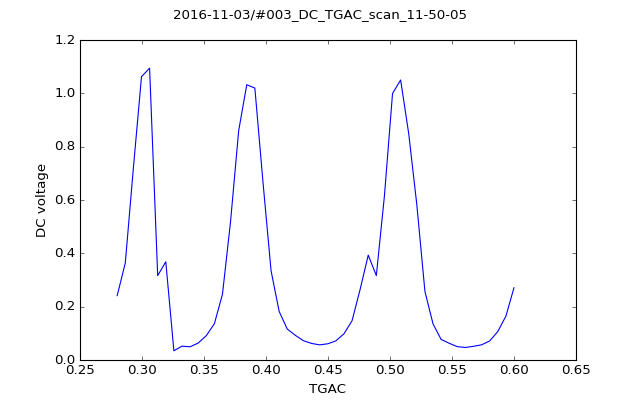

In [2]:
gate1 = TGAC

gate1_vals = list(np.linspace(0.28,0.6, 50))

DC_parameter.setup()
data = qc.Loop(gate1[gate1_vals]
              ).each(DC_parameter
                    ).then(qc.Task(layout.stop)
                          ).run(name='DC_{}_scan'.format(gate1.name),
                                progress_interval=True)

plot = qc.MatPlot(data.DC_voltage)

### 2D DC scans

DataSet:
   mode     = DataMode.PULL_FROM_SERVER
   location = '2016-11-24/#010_DC_TGAC_vs_DF_DS_scan_16-09-48'
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | TGAC_set   | TGAC         | (20,)
   Setpoint | DF_DS_set  | DF_DS        | (20, 40)
   Measured | DC_voltage | DC_voltage   | (20, 40)
started at 2016-11-24 16:09:52


<IPython.core.display.Javascript object>


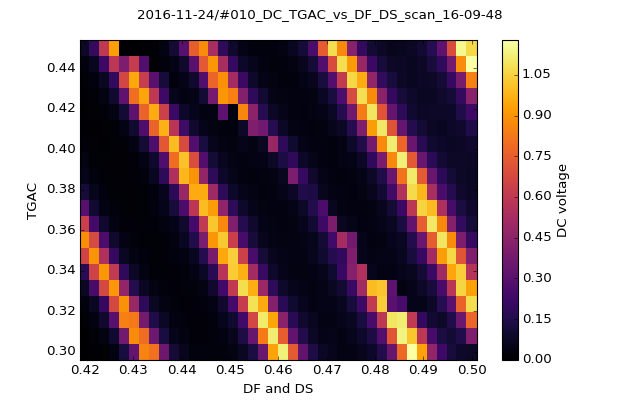

In [2]:
gate1 = TGAC
gate2 = DF_DS

gate1_vals = list(np.linspace(0.3,0.45, 20))
gate2_vals = list(np.linspace(0.42, 0.5, 40))

DC_parameter.setup()
data = qc.Loop(gate1[gate1_vals]
              ).loop(gate2[gate2_vals]
                    ).each(DC_parameter
                          ).then(qc.Task(layout.stop)
                                ).run(name='DC_{}_vs_{}_scan'.format(gate1.name, gate2.name),
                                      progress_interval=True)

plot = qc.MatPlot(data.DC_voltage)

# EPR sequence - no steering/ESR

In [2]:
EPR_parameter.pulse_sequence['read'].duration = 80
EPR_parameter.setup(samples=100, t_read=20)
#result = EPR_parameter()

In [4]:
EPR_parameter.pulse_sequence

PulseSequence with 4 pulses, duration: 92
	DCPulse(empty, A=-1.5, t_start=0, t_stop=5)
	DCPulse(load, A=1.5, t_start=5, t_stop=10)
	DCPulse(read, A=0, t_start=10, t_stop=90)
	DCPulse(final, A=0, t_start=90, t_stop=92)

In [5]:
TGAC_vals = list(np.linspace(0.315,0.36,8))
DF_DS_vals = list(np.linspace(0.472, 0.485,8))

In [ ]:
EPR_parameter.pulse_sequence['read'].duration = 100
EPR_parameter.setup(samples=80, t_read=20)
data = qc.Loop(TGAC[TGAC_vals]
              ).loop(DF_DS[DF_DS_vals]
                    ).each(EPR_parameter
                          ).run(name='EPR_calibration',
                                progress_interval=True)

<IPython.core.display.Javascript object>


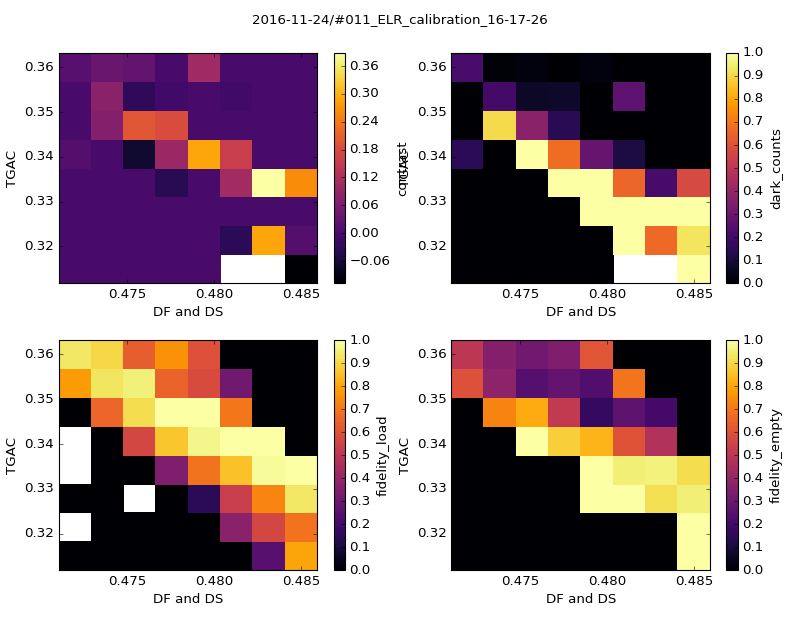

In [7]:
plot = qc.MatPlot(subplots=(2,2), figsize=(10,8), interval=10)
plot.add(data.contrast, subplot=1, nticks=6)
plot.add(data.dark_counts, subplot=2, nticks=6)
plot.add(data.fidelity_load, subplot=3, nticks=6)
plot.add(data.fidelity_empty, subplot=4, nticks=6)
plot.fig.tight_layout(rect=[0, 0.03, 1, 0.95])

In [2]:
SIM900.reset_slot(6)

In [9]:
EPR_parameter.setup(samples=150, print_results=True)
EPR_parameter();

fidelity_empty: 0.984
fidelity_load: 1.000
fidelity_read: 0.636
up_proportion: 0.678
dark_counts: 0.269
contrast: 0.409


# Adiabatic sweep scan - ESR, no steering

### center frequency scan

This code sweeps over the adiabatic sweep center frequency to find the ESR frequency.

To find the ESR frequency, use 28GHz * B0 as starting point, and search around that frequency.
Use a big initial frequency_deviation (around 60 MHz) and long duration (0.5 ms)
Once you see a spike in contrast, center around there and decrease both deviation and duration.

In [14]:
adiabatic_sweep_parameter(25.2e9)
keysight.power()

10.0

In [15]:
adiabatic_sweep_parameter.steered_initialization=False

In [16]:
adiabatic_sweep_parameter.pulse_sequence

PulseSequence with 4 pulses, duration: 62
	DCPulse(load, A=1.5, t_start=0, t_stop=10)
	FrequencyRampPulse(adiabatic_sweep, f_start=25185.00 MHz, f_stop=25215.00, A=None, t_start=9, t_stop=9.2)
	DCPulse(read, A=0, t_start=10, t_stop=60)
	DCPulse(final, A=0, t_start=60, t_stop=62)

In [32]:
interfaces['arbstudio'].final_delay(10)

adiabatic_sweep_parameter.pulse_sequence['adiabatic_sweep'].frequency_deviation=10e6
adiabatic_sweep_parameter.pulse_sequence['adiabatic_sweep'].duration = 0.2
adiabatic_sweep_parameter.pulse_sequence['adiabatic_sweep'].power = 10

In [44]:
f_center = 25.175e9
f_span = 100e6
f_step = 2e6
adiabatic_sweep_vals = list(np.arange(f_center-f_span/2, f_center+f_span/2, f_step))

adiabatic_sweep_parameter.setup(samples=100, readout_threshold_voltage=threshold_voltage)


In [45]:
adiabatic_sweep_parameter.pulse_sequence['adiabatic_sweep'].duration

0.2

DataSet:
   mode     = DataMode.PULL_FROM_SERVER
   location = '2016-11-25/#003_adiabatic_sweep_12-58-42'
   <Type>   | <array_id>          | <array.name>    | <array.shape>
   Setpoint | adiabatic_sweep_set | adiabatic_sweep | (50,)
   Measured | fidelity_load       | fidelity_load   | (50,)
   Measured | fidelity_read       | fidelity_read   | (50,)
   Measured | up_proportion       | up_proportion   | (50,)
   Measured | dark_counts         | dark_counts     | (50,)
   Measured | contrast            | contrast        | (50,)
started at 2016-11-25 12:58:45


<IPython.core.display.Javascript object>


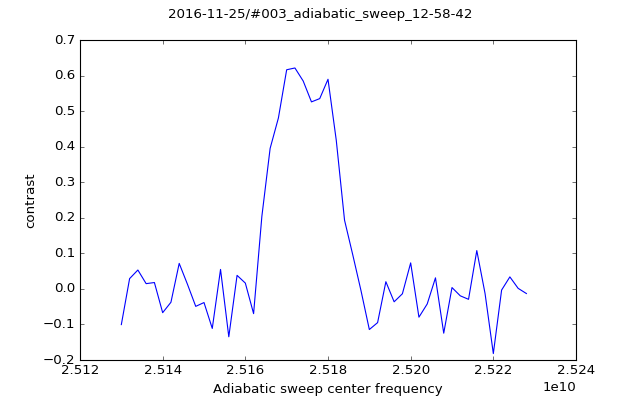

In [46]:
data = qc.Loop(adiabatic_sweep_parameter[adiabatic_sweep_vals]
                     ).each(adiabatic_sweep_parameter
                           ).run(name='adiabatic_sweep',
                                progress_interval=True)
plot = qc.MatPlot(data.contrast, use_offset=False)

## LR calibration scan - ESR and steering

In [11]:
TGAC_vals = list(np.linspace(0.335,0.35,8))
DF_DS_vals = list(np.linspace(0.477, 0.484,8))

In [12]:
#steered_controller.setup(readout_threshold_voltage=threshold_voltage)
#layout.setup(samples=10, readout_threshold_voltage=threshold_voltage)
adiabatic_sweep_parameter = measurement_parameters.AdiabaticSweep_Parameter(layout=layout)
adiabatic_sweep_parameter.setup(threshold_voltage,samples=80)
adiabatic_sweep_parameter.pulse_sequence['read'].duration = 80

frequency_center = 25.175e9
adiabatic_sweep_parameter(frequency_center)
adiabatic_sweep_parameter.pulse_sequence['adiabatic_sweep'].frequency_deviation=10e6
adiabatic_sweep_parameter.pulse_sequence['adiabatic_sweep'].duration = 0.2

In [13]:
adiabatic_sweep_parameter.pulse_sequence['adiabatic_sweep'].frequency_center

25175000000.0

In [14]:
adiabatic_sweep_parameter.pulse_sequence

PulseSequence with 5 pulses, duration: 92
	DCPulse(load, A=1.5, t_start=0, t_stop=10)
	SteeredInitialization(steered_initialization, t_no_blip=30 ms, t_max_wait=200, t_buffer=20)
	FrequencyRampPulse(adiabatic_sweep, f_start=25170.00 MHz, f_stop=25180.00, A=None, t_start=9, t_stop=9.2)
	DCPulse(read, A=0, t_start=10, t_stop=90)
	DCPulse(final, A=0, t_start=90, t_stop=92)

In [15]:
data = qc.Loop(TGAC[TGAC_vals]
              ).loop(DF_DS[DF_DS_vals]
                    ).each(adiabatic_sweep_parameter
                          ).run(name='adiabatic_calibration',
                                progress_interval=True)

DataSet:
   mode     = DataMode.PULL_FROM_SERVER
   location = '2016-11-28/#002_adiabatic_calibration_10-57-44'
   <Type>   | <array_id>    | <array.name>  | <array.shape>
   Setpoint | TGAC_set      | TGAC          | (8,)
   Setpoint | DF_DS_set     | DF_DS         | (8, 8)
   Measured | fidelity_load | fidelity_load | (8, 8)
   Measured | fidelity_read | fidelity_read | (8, 8)
   Measured | up_proportion | up_proportion | (8, 8)
   Measured | dark_counts   | dark_counts   | (8, 8)
   Measured | contrast      | contrast      | (8, 8)
started at 2016-11-28 10:57:47


<IPython.core.display.Javascript object>


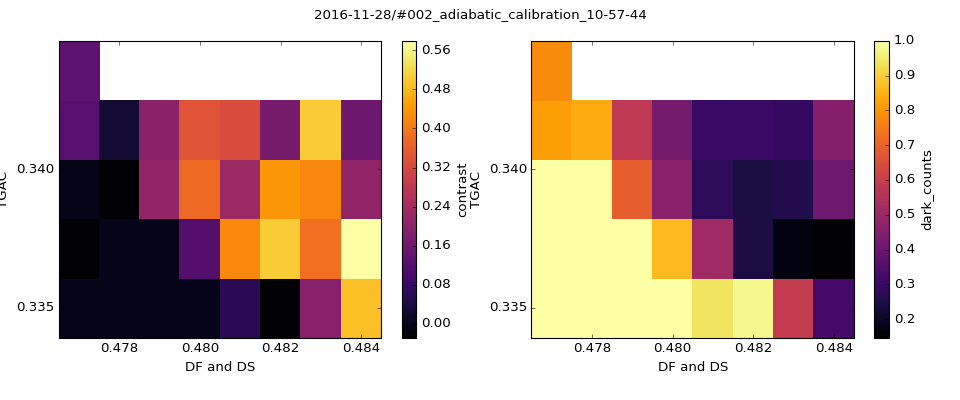

In [16]:
plot = qc.MatPlot(subplots=(1,2), figsize=(12,5), interval=10)
plot.add(data.contrast, subplot=1, nticks=6)
plot.add(data.dark_counts, subplot=2, nticks=6)
plot.fig.tight_layout(rect=[0, 0.03, 1, 0.95])

In [17]:
TGAC(0.337)
DF_DS(0.484)

In [19]:
adiabatic_sweep_parameter.setup(samples=150, readout_threshold_voltage=threshold_voltage, 
                                print_results=True)
adiabatic_sweep_parameter();

fidelity_load: 0.000
fidelity_read: 0.674
up_proportion: 0.752
dark_counts: 0.210
contrast: 0.542


### calibration of adiabatic sweep: frequency span versus time scan

In [5]:
pulse = adiabatic_sweep_parameter.pulse_sequence['adiabatic_sweep']
adiabatic_deviation_parameter = general_parameters.AttributeParameter(object=pulse, attribute='frequency_deviation')
adiabatic_duration_parameter = general_parameters.AttributeParameter(object=pulse, attribute='duration')

adiabatic_deviation_vals = list(np.logspace(5.5, 7.8, 8))
adiabatic_duration_vals = list(np.logspace(-2.7, -0.3, 8))

In [18]:
adiabatic_sweep_parameter.pulse_sequence['read'].duration = 100
adiabatic_sweep_parameter.setup(samples=400)
adiabatic_sweep_parameter(frequency_center)
data = qc.Loop(adiabatic_deviation_parameter[adiabatic_deviation_vals]
              ).loop(adiabatic_duration_parameter[adiabatic_duration_vals]
                    ).each(adiabatic_sweep_parameter
                          ).run(name='adiabatic_deviation_vs_duration',
                                progress_interval=True)

DataSet:
   mode     = DataMode.PULL_FROM_SERVER
   location = '2016-11-11/#004_adiabatic_deviation_vs_duration_09-57-31'
   <Type>   | <array_id>              | <array.name>        | <array.shape>
   Setpoint | frequency_deviation_set | frequency_deviation | (10,)
   Setpoint | duration_set            | duration            | (10, 8)
   Measured | fidelity_load           | fidelity_load       | (10, 8)
   Measured | fidelity_read           | fidelity_read       | (10, 8)
   Measured | up_proportion           | up_proportion       | (10, 8)
   Measured | dark_counts             | dark_counts         | (10, 8)
   Measured | contrast                | contrast            | (10, 8)
started at 2016-11-11 09:57:34


<IPython.core.display.Javascript object>


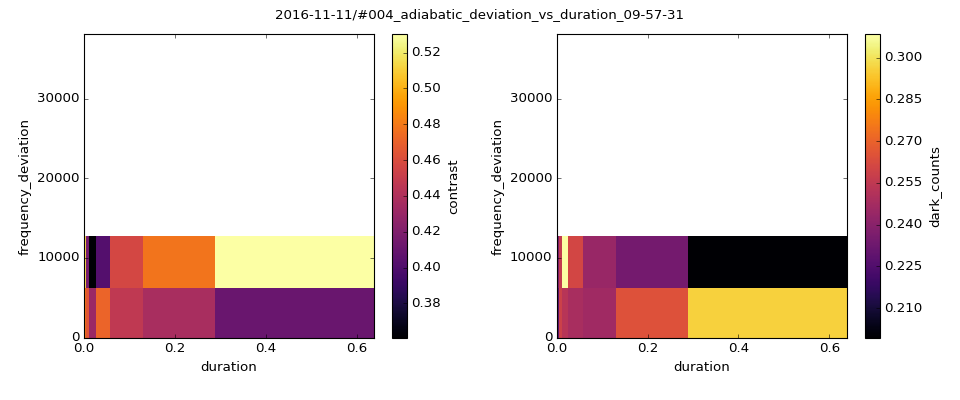

In [21]:
plot = qc.MatPlot(subplots=(1,2), figsize=(12,5), interval=10)
plot.add(data.contrast, subplot=1, nticks=6)
plot.add(data.dark_counts, subplot=2, nticks=6)
# for ax in plot.subplots:
#     ax.set_xscale('log')
#     ax.set_yscale('log')
plot.fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# Read level sweep - to be fixed

In [28]:
variable_read_parameter.setup(samples=100)
data = qc.Loop(variable_read_parameter[-1.5:2.5:0.04]
                     ).each(variable_read_parameter
                           ).run(name='variable_read',
                                progress_interval=True)

NameError: name 'variable_read_parameter' is not defined

In [42]:
plotQ = qc.QtPlot()
plotQ.add(data.Channel_A_signal)

plotQ = qc.QtPlot()
plotQ.add(data.Channel_C_signal)

# T1 measurement

In [4]:
T1_parameter.pulse_sequence['steered_initialization'].enabled = False

T1_parameter.pulse_sequence['plunge'].amplitude=1.8

T1_parameter.pulse_sequence['adiabatic_sweep'].enabled = True
T1_parameter.pulse_sequence['adiabatic_sweep'].frequency_center=frequency_center
T1_parameter.pulse_sequence['adiabatic_sweep'].frequency_deviation=10e6
T1_parameter.pulse_sequence['adiabatic_sweep'].t_start=1
T1_parameter.pulse_sequence['adiabatic_sweep'].duration = 0.2

T1_parameter.pulse_sequence['read'].duration = 20

T1_parameter.setup(threshold_voltage, samples=4)
T1_parameter(10000)
T1_parameter.print_results = True

In [5]:
%time up_proportion,number_traces_loaded = T1_parameter()

Memory usages: [194, 224, 224]
buffer type <class 'numpy.ndarray'>, size 96, segment size 288
Memory usages: [224, 255, 255]
buffer type <class 'numpy.ndarray'>, size 96, segment size 288
Memory usages: [255, 286, 286]
buffer type <class 'numpy.ndarray'>, size 96, segment size 288
Memory usages: [286, 316, 316]
buffer type <class 'numpy.ndarray'>, size 96, segment size 288
up_proportion: 0.750
Wall time: 42.8 s


In [10]:
arr = np.zeros((100,100,100,100))
arr[1]=4

In [34]:
from collections import defaultdict
from gc import get_objects
before = defaultdict(int)
after = defaultdict(int)
for i in get_objects():
    before[type(i)] += 1 

In [36]:
for i in get_objects():
    after[type(i)] += 1

print([(k, after[k] - before[k]) for k in after if after[k] - before[k]])

[(<class 'SyntaxError'>, 2), (<class '_ast.comprehension'>, 1), (<class '_ast.Num'>, 1), (<class 'getset_descriptor'>, 2), (<class '_ast.Subscript'>, 5), (<class 'traceback'>, 4), (<class '_ast.Tuple'>, 1), (<class 'dict'>, 44), (<class '_ctypes.PyCArrayType'>, 1), (<class '_ast.BinOp'>, 2), (<class '_ast.Name'>, 17), (<class '_ast.For'>, 1), (<class '_ast.Module'>, 1), (<class '_ast.ListComp'>, 1), (<class 'frame'>, 18), (<class 'weakref'>, 3), (<class 'IPython.core.interactiveshell.ExecutionResult'>, 1), (<class 'weakcallableproxy'>, 1), (<class 'function'>, 2), (<class 'zmq.sugar.frame.Frame'>, 7), (<class 'StgDict'>, 1), (<class 'tuple'>, 15), (<class '_ast.Call'>, 3), (<class 'list'>, 21), (<class '_ast.AugAssign'>, 1), (<class '_ast.Expr'>, 1), (<class '_ast.Index'>, 5), (<class 'cell'>, 2)]


In [9]:
import logging
from mem_top import mem_top

In [13]:
result0 = mem_top()

In [17]:
print(result0)


refs:
3996	<class 'list'> ['# module pyparsing.py\n', '#\n', '# Copyright (c) 2003-2015  Paul T. McGuire\n', '#\n', '# Permiss
3241	<class 'list'> ['# -*- coding: utf-8 -*-\n', '"""Main IPython class."""\n', '\n', '#-------------------------------
2744	<class 'dict'> {115552584: <weakref at 0x0000000009E74DB8; to 'type' at 0x0000000006E33148 (DatetimeIndexOpsMixin)>
1840	<class 'list'> ['"""\n', 'This is an object-oriented plotting library.\n', '\n', 'A procedural interface is provide
1618	<class 'dict'> {'matplotlib.offsetbox': <module 'matplotlib.offsetbox' from 'C:\\Users\\lab.BluG12Meas\\Anaconda3\\
1195	<class 'list'> ['"""\n', 'The rcsetup module contains the default values and the validation code for\n', "customiza
1068	<class 'dict'> {'Key_Agrave': 192, 'MatchCaseSensitive': 16, 'WA_TouchPadAcceptSingleTouchEvents': 123, 'CursorMove
1053	<class 'list'> ['#!/usr/bin/env python\n', '#\n', '# Copyright 2009 Facebook\n', '#\n', '# Licensed under the Apach
978	<class 'dict'> {10279

In [20]:
print(mem_top())


refs:
3996	<class 'list'> ['# module pyparsing.py\n', '#\n', '# Copyright (c) 2003-2015  Paul T. McGuire\n', '#\n', '# Permiss
3241	<class 'list'> ['# -*- coding: utf-8 -*-\n', '"""Main IPython class."""\n', '\n', '#-------------------------------
2744	<class 'dict'> {115552584: <weakref at 0x0000000009E74DB8; to 'type' at 0x0000000006E33148 (DatetimeIndexOpsMixin)>
1840	<class 'list'> ['"""\n', 'This is an object-oriented plotting library.\n', '\n', 'A procedural interface is provide
1618	<class 'dict'> {'matplotlib.offsetbox': <module 'matplotlib.offsetbox' from 'C:\\Users\\lab.BluG12Meas\\Anaconda3\\
1195	<class 'list'> ['"""\n', 'The rcsetup module contains the default values and the validation code for\n', "customiza
1068	<class 'dict'> {'Key_Agrave': 192, 'MatchCaseSensitive': 16, 'WA_TouchPadAcceptSingleTouchEvents': 123, 'CursorMove
1053	<class 'list'> ['#!/usr/bin/env python\n', '#\n', '# Copyright 2009 Facebook\n', '#\n', '# Licensed under the Apach
978	<class 'dict'> {10279

In [26]:
# Calculate T1 durations (shuffled)
T1_wait_times = list(np.logspace(1, 4, num=12, base=10))
#np.random.shuffle(T1_wait_times)
print('Shuffled T1 wait times: {}'.format(T1_wait_times))

Shuffled T1 wait times: [10.0, 18.738174228603839, 35.111917342151308, 65.793322465756788, 123.28467394420659, 231.01297000831579, 432.87612810830569, 811.13083078968725, 1519.9110829529332, 2848.0358684357989, 5336.6992312063076, 10000.0]


DataSet:
   mode     = DataMode.PULL_FROM_SERVER
   location = '2016-11-28/#008_T1_single_sweep_11-54-44'
   <Type>   | <array_id>        | <array.name>      | <array.shape>
   Setpoint | T1_wait_time_set  | T1_wait_time      | (20,)
   Measured | up_proportion     | up_proportion     | (20,)
   Measured | num_traces_loaded | num_traces_loaded | (20,)
started at 2016-11-28 11:54:48


<IPython.core.display.Javascript object>


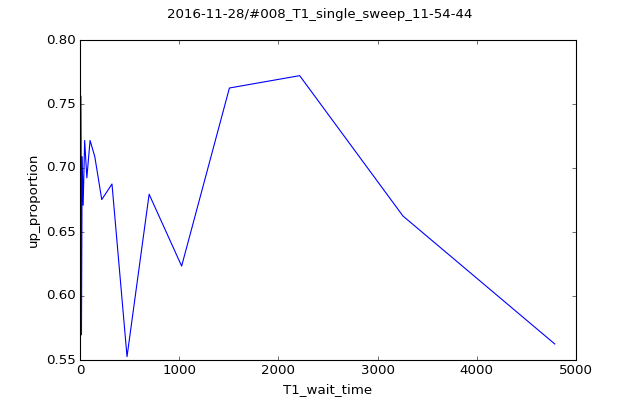

In [14]:
# Single T1 sweep

data = qc.Loop(T1_parameter[T1_wait_times]
                     ).each(T1_parameter
                           ).run(name='T1_single_sweep')

plotQ = qc.MatPlot()
plotQ.add(data.up_proportion)

In [ ]:
# simple repetitive sweep
data = qc.Loop(dummy_parameter[0:30:1]
              ).each(qc.Loop(T1_parameter[T1_wait_times]).each(T1_parameter)
                    ).run(name='T1_data', progress_interval=True)


<IPython.core.display.Javascript object>


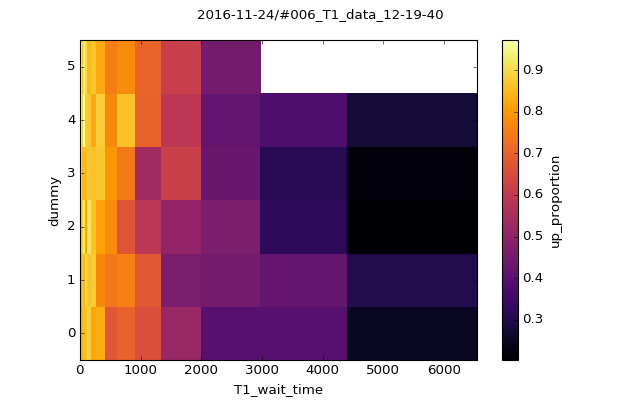

In [39]:
plotQ = qc.MatPlot()
plotQ.add(data.up_proportion)

In [6]:
# T1 sweep with raw data and LR parameter

#Parameter setup
#LR
adiabatic_sweep_parameter = measurement_parameters.AdiabaticSweep_Parameter(layout=layout)
adiabatic_sweep_parameter.setup(threshold_voltage,samples=100)
adiabatic_sweep_parameter.pulse_sequence['read'].duration = 80
adiabatic_sweep_parameter(frequency_center)
adiabatic_sweep_parameter.pulse_sequence['adiabatic_sweep'].frequency_deviation=10e6
adiabatic_sweep_parameter.pulse_sequence['adiabatic_sweep'].duration = 0.2
#T1
T1_parameter = measurement_parameters.T1_Parameter(layout=layout)
T1_parameter.pulse_sequence['read'].duration = 20
T1_parameter.pulse_sequence['adiabatic_sweep'].frequency_deviation=10e6
T1_parameter.pulse_sequence['adiabatic_sweep'].duration = 0.2
T1_parameter.pulse_sequence['adiabatic_sweep'].frequency_center=frequency_center
T1_parameter.pulse_sequence['adiabatic_sweep'].t_start=1.8
T1_parameter.pulse_sequence['adiabatic_sweep'].t_stop=2
T1_parameter.pulse_sequence['adiabatic_plunge'].amplitude=1.8
T1_parameter.pulse_sequence['plunge'].amplitude=1.8

setup_LR = partial(adiabatic_sweep_parameter.setup, threshold_voltage, samples=400, data_manager=data_manager_raw)
setup_T1 = partial(T1_parameter.setup, threshold_voltage, samples=150, data_manager=data_manager_raw)
setup_LR()
setup_T1()

T1_parameter.pulse_sequence


PulseSequence with 6 pulses, duration: 29
	SteeredInitialization(steered_initialization, t_no_blip=30 ms, t_max_wait=200, t_buffer=20)
	DCPulse(adiabatic_plunge, A=1.8, t_start=0, t_stop=2)
	FrequencyRampPulse(adiabatic_sweep, f_start=25170.00 MHz, f_stop=25180.00, A=None, t_start=1.8, t_stop=2)
	DCPulse(plunge, A=1.8, t_start=2, t_stop=7)
	DCPulse(read, A=0, t_start=7, t_stop=27)
	DCPulse(final, A=0, t_start=27, t_stop=29)

In [9]:
data = qc.Loop(dummy_parameter[0:30:1]
              ).each(qc.Task(setup_LR),
                     adiabatic_sweep_parameter,
                     qc.Task(setup_T1),
                     qc.Loop(T1_parameter[T1_wait_times]).each(T1_parameter)
                    ).run(name='T1_data', progress_interval=True)

DataSet:
   mode     = DataMode.PULL_FROM_SERVER
   location = '2016-11-25/#007_T1_data_17-34-08'
   <Type>   | <array_id>          | <array.name>      | <array.shape>
   Setpoint | dummy_set           | dummy             | (30,)
   Measured | fidelity_load       | fidelity_load     | (30,)
   Measured | fidelity_read       | fidelity_read     | (30,)
   Measured | up_proportion_1_2   | up_proportion     | (30,)
   Measured | dark_counts         | dark_counts       | (30,)
   Measured | contrast            | contrast          | (30,)
   Setpoint | T1_wait_time_set    | T1_wait_time      | (30, 20)
   Measured | up_proportion_3_0_0 | up_proportion     | (30, 20)
   Measured | num_traces_loaded   | num_traces_loaded | (30, 20)
started at 2016-11-25 17:34:12


<IPython.core.display.Javascript object>


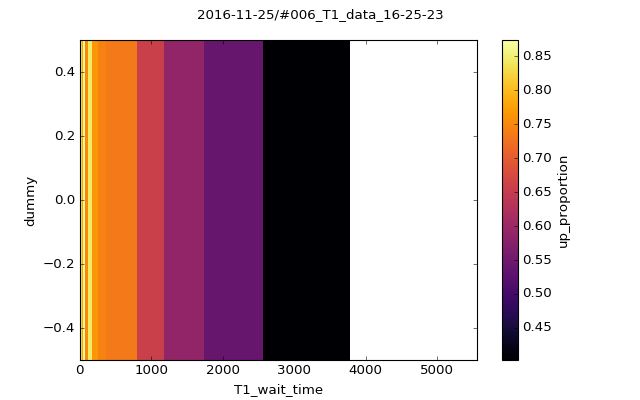

In [74]:
plotQ = qc.MatPlot()
plotQ.add(data.up_proportion_3_0_0)

## T1 analysis

Number of successful sweeps: 5


<IPython.core.display.Javascript object>


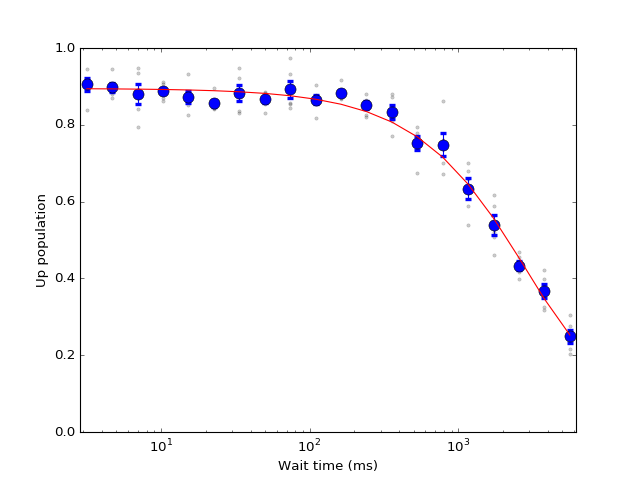

[[Model]]
    Model(fit_function)
[[Fit Statistics]]
    # function evals   = 19
    # data points      = 20
    # variables        = 3
    chi-square         = 605988931351.996
    reduced chi-square = 35646407726.588
    Akaike info crit   = 488.688
    Bayesian info crit = 491.675
[[Variables]]
    offset:      0.14792625 +/- 0.043291 (29.27%) (init= 0.2493038)
    amplitude:   0.74677900 +/- 0.041910 (5.61%) (init= 0.8977637)
    tau:         2862.43202 +/- 320.7465 (11.21%) (init= 3788.001)
[[Correlations]] (unreported correlations are <  0.100)
    C(offset, amplitude)         = -0.991 
    C(offset, tau)               = -0.942 
    C(amplitude, tau)            =  0.913 



In [41]:

T1_msmt = T1_Measurement(B0=1.2, location='2016-11-24/#006_T1_data_12-19-40')
T1_msmt.plot_T1()
print(T1_msmt.fit_result.fit_report())

In [40]:
#data.arrays['up_proportion']
data.T1_wait_time_set[0]

array([  3.16227766e+00,   4.68870200e+00,   6.95192796e+00,
         1.03076080e+01,   1.52830673e+01,   2.26601697e+01,
         3.35981829e+01,   4.98159505e+01,   7.38619982e+01,
         1.09515019e+02,   1.62377674e+02,   2.40757013e+02,
         3.56969885e+02,   5.29278449e+02,   7.84759970e+02,
         1.16356185e+03,   1.72521055e+03,   2.55796582e+03,
         3.79269019e+03,   5.62341325e+03])

In [15]:
# Continuous T1 sweep
setup_ELRLR = partial(ELRLR_parameter.setup, samples=400, data_manager=data_manager_raw)
setup_T1 = partial(T1_parameter.setup, threshold_voltage=threshold_voltage, samples=150, data_manager=data_manager_raw)
setup_ELRLR()
setup_T1()
data = qc.Loop(dummy_param[0:30:1]
              ).each(qc.Task(setup_ELRLR),
                     ELRLR_parameter,
                     qc.Task(setup_T1),
                     qc.Loop(T1_parameter[T1_wait_times]).each(T1_parameter)
                    ).run(name='T1_data', progress_interval=True)

# plotQ = qc.QtPlot()
# plotQ.add(data.up_proportion)

DataSet:
   mode     = DataMode.PULL_FROM_SERVER
   location = '2016-10-21/#009_T1_data_17-09-21'
   <Type>   | <array_id>          | <array.name>      | <array.shape>
   Setpoint | dummy_set           | dummy             | (30,)
   Measured | fidelity_empty      | fidelity_empty    | (30,)
   Measured | fidelity_load       | fidelity_load     | (30,)
   Measured | fidelity_read       | fidelity_read     | (30,)
   Measured | up_proportion_1_3   | up_proportion     | (30,)
   Measured | dark_counts         | dark_counts       | (30,)
   Measured | contrast            | contrast          | (30,)
   Setpoint | T1_wait_time_set    | T1_wait_time      | (30, 20)
   Measured | up_proportion_3_0_0 | up_proportion     | (30, 20)
   Measured | num_traces_loaded   | num_traces_loaded | (30, 20)
started at 2016-10-21 17:09:23


In [19]:
data.sync()
print(data.T1_wait_time_set[0])
data.up_proportion_3_0_0[29]

[  1.58489000e+04   2.22520000e+02   1.07542000e+04   3.20083000e+01
   1.02453000e+02   3.27936000e+02   7.12249000e+02   1.04967000e+03
   4.95150000e+03   7.29723000e+03   1.54694000e+03   1.50990000e+02
   4.71720000e+01   2.17191000e+01   2.27979000e+03   3.35982000e+03
   4.83293000e+02   1.47374000e+01   1.00000000e+01   6.95193000e+01]


array([ 0.14094 ,  0.42    ,  0.193333,  0.510067,  0.463087,  0.436242,
        0.422819,  0.42953 ,  0.194631,  0.213333,  0.342282,  0.433333,
        0.44    ,  0.418919,  0.328859,  0.263514,  0.456376,  0.483221,
        0.436242,  0.44898 ])

# Notes

To save individual traces when performing a measurement, set:
    
EPR_parameter.setup(samples=100, data_manager=data_manager_raw)

In [ ]:
steered_initialization = adiabatic_sweep_parameter.pulse_sequence['steered_initialization']

In [10]:
adiabatic_sweep_parameter.pulse_sequence['load'].t_stop=15

In [63]:
adiabatic_sweep_parameter.steered_initialization

False

In [65]:
steered_controller.record_initialization_traces

<qcodes.instrument.remote.RemoteParameter: record_initialization_traces at 203922680>

To enable/disable steered initialization, use:

adiabatic_sweep_parameter.steered_intialization = True/False

This adds/removes the steered initialization "pulse" from the EPR_parameter.pulse_sequence
If steered_initialization is enabled, you can access and modify its properties via

steered_initialization = adiabatic_sweep_parameter.pulse_sequence['steered_initialization']

Note that steered initialization is currently only implemented for the adiabatic sweep, but is easy to add for other parameters, such as T1_parameter (just add the pulse)

steered_controller is the acquisition controller specifically for steered initialization
You can look at the initialization traces when using steered initialization.

First set the flag 
steered_controller.record_initialization_traces(True)

The initialization traces can then be accessed
steered_controller.initialization_traces()

You can also look at the first buffer after the pulseblaster.start() command has been set via
steered_controller.post_initialization_traces()
This can be useful for checking the delay between sending the command and plunging

To setup a parameter where steered initialization is enabled, you must pass it a readout threshold voltage every time.

adiabatic_sweep_parameter.setup(readout_threshold_voltage=threshold_voltage)

This threshold voltage can be obtained from an EPR scan (see T1_measurement):

EPR_parameter.setup(samples=30)
EPR_parameter()
traces_read = EPR_parameter.trace_segments['output']['read']
_, _, readout_threshold_voltage = analysis.find_high_low(traces_read)

In [ ]:
adiabatic_sweep_parameter.pulse_sequence.add(adiabatic_sweep_parameter._steered_initialization)
adiabatic_sweep_parameter.pulse_sequence.remove(adiabatic_sweep_parameter._steered_initialization)